In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("/kaggle/input/bookstore-transactions/dataset_4_Bookstore Transactions.csv")
# output = []
# output.append()
# output.append("")
print(df.head())
# output.append(f"First")

         Date      Product Region Customer_Type  Quantity  Price  Discount  \
0  2024-10-05      Fiction  North       Student         3  52.51      0.16   
1  2024-03-28      Fiction   East       Regular         2  92.19      0.11   
2  2024-04-12    Textbooks   East       Student         7  92.21      0.08   
3  2024-12-12  Non-Fiction  South       Regular         6  16.31      0.07   
4  2024-07-28   Children's   East       Regular        13  59.57      0.23   

   Revenue  
0   132.33  
1   164.10  
2   593.83  
3    91.01  
4   596.30  


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [24]:
print(df.describe())
# output.append(f"Summary Statistics:\n{df.describe()}\n")

          Quantity        Price     Discount      Revenue
count  1000.000000  1000.000000  1000.000000  1000.000000
mean      8.231000    52.988980     0.152280   370.917180
std       4.351388    27.755557     0.084307   299.055872
min       1.000000     5.060000     0.000000     4.560000
25%       4.000000    29.040000     0.080000   122.262500
50%       8.000000    54.350000     0.150000   289.905000
75%      12.000000    76.792500     0.230000   546.392500
max      15.000000    99.880000     0.300000  1364.030000


In [26]:
missing_values = df.isnull().sum()
print(missing_values)
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64


In [36]:
duplicates = df.duplicated().sum()
print(duplicates)
df.drop_duplicates(inplace=True)
df

0


,Date,Product,Region,Customer_Type,Quantity,Price,Discount,Revenue
0,2024-10-05,Fiction,North,Student,3,52.51,0.16,132.33
1,2024-03-28,Fiction,East,Regular,2,92.19,0.11,164.10
2,2024-04-12,Textbooks,East,Student,7,92.21,0.08,593.83
3,2024-12-12,Non-Fiction,South,Regular,6,16.31,0.07,91.01
4,2024-07-28,Children's,East,Regular,13,59.57,0.23,596.30
...,...,...,...,...,...,...,...,...
995,2024-06-02,Children's,South,Regular,12,83.81,0.20,804.58
996,2024-05-18,Children's,South,Student,11,90.99,0.19,810.72
997,2024-07-22,Non-Fiction,South,Regular,9,88.99,0.21,632.72
998,2024-11-23,Fiction,West,Student,15,25.41,0.22,297.30


In [40]:
total_revenue = df['Price'].sum()
# output.append(f'Total Revenue: ${total_revenue}\n')
print(f'Total Revenue: TK{total_revenue}')

Total Revenue: TK52988.979999999996


In [44]:
average_price_per_service = df.groupby('Customer_Type')['Price'].mean()
# output.append("Average Price per Customer Type:\n")
# output.append(f"{average_price_per_service}\n")

print(average_price_per_service)

Customer_Type
Regular    53.107405
Student    52.858613
Name: Price, dtype: float64


In [47]:
total_services_by_product = df['Product'].value_counts()
# output.append("Total Services Provided by Product:\n")
# output.append(f"{total_services_by_product}\n")
print(total_services_by_product)

Product
Fiction        255
Textbooks      251
Non-Fiction    247
Children's     247
Name: count, dtype: int64


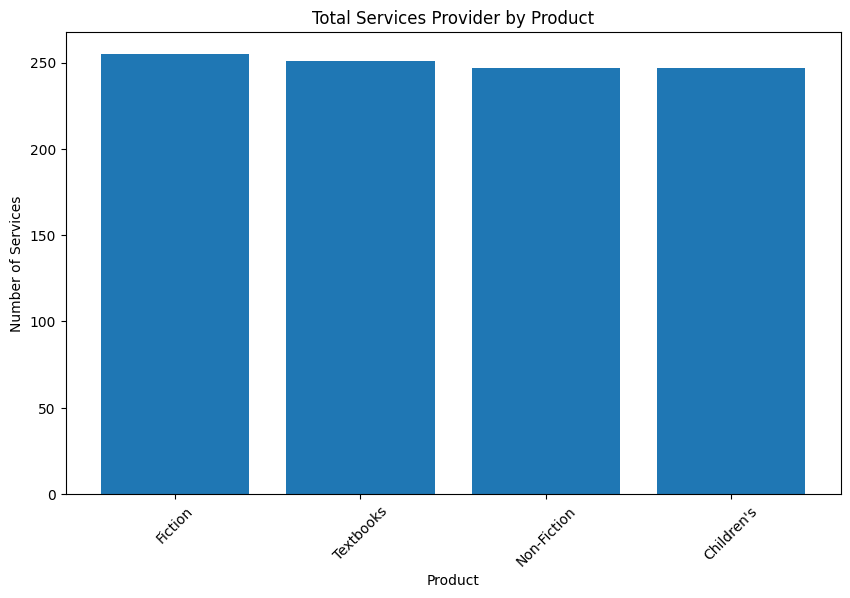

In [51]:
plt.figure(figsize=(10,6))
plt.bar(total_services_by_product.index,total_services_by_product.values)
plt.title("Total Services Provider by Product")
plt.xlabel('Product')
plt.ylabel('Number of Services')
plt.xticks(rotation=45)
plt.savefig('total_services_by_product.png')
plt.show()

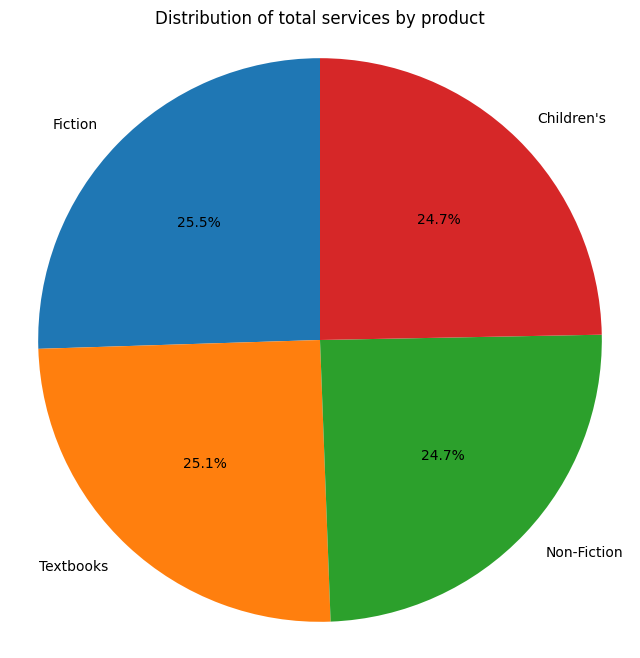

In [57]:
plt.figure(figsize=(8, 8))
plt.pie(total_services_by_product, labels=total_services_by_product.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of total services by product')
plt.axis('equal')
plt.savefig('services_distriution_by_product.png')
plt.show()